### Ejercicio 1:

Mediante un algoritmo genético desarrollado en Python encontrar el valor máximo de la función
$
y=x^2
$
a. Indicar el resultado de la solución encontrada (valor de "x") si se ejecutan 10 lanzamientos del algoritmo.
Parámetros:

- Selección por ruleta
- Intervalo de la variable de decisión: [0,31] ∈ Z
- Aplicar elitismo: Sí
- Gen de cruza monopunto aleatorio
- Probabilidad de cruce: 0.92
- Probabilidad de mutación: 0.1
- Tamaño de la población: 4
- Generaciones 10


In [1]:
# set for reproducibility
import random

import numpy as np

random.seed(42)

In [2]:
from EvolutionaryAlgorithm import Roulette
import pandas as pd

executions = 10
df = pd.DataFrame()
for run in range(executions):

    ea = Roulette(
        generations=10,
        chromosome_length=5,
        population_length=4,
        maximize=True,
        target_fn=lambda x:x**2,
        elitism=True,
        crossover_rate=0.92,
        x_min=0,
        x_max=31,
        mutation_rate=0.1
    )
    ea.execute()
    chromosome, best, fitness = ea.get_best_individual()
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "fitness": fitness}
    df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)      
    
display(df)

,run,best chromosome,best solution,fitness
0,0,11111,31.0,961.0
1,1,11111,31.0,961.0
2,2,11111,31.0,961.0
3,3,11111,31.0,961.0
4,4,11101,29.0,841.0
5,5,11111,31.0,961.0
6,6,11111,31.0,961.0
7,7,11111,31.0,961.0
8,8,11101,29.0,841.0
9,9,11111,31.0,961.0


## Ejercicio 2
Minimizar mediante tres algoritmos genéticos desarrollados en Python la función $
y=x^2
$
a. Indicar el resultado de la solución encontrada (valor de "x") si se ejecutan 3 algoritmos un total de 30 lanzamientos cada uno.
Parámetros:
- Selección por Ranking, Ruleta y Torneo
- Intervalo de la variable de decisión: [-31,31] ∈ R (con un dígito decimal)
- Aplicar elitismo: Sí (Sólo en método ruleta y ranking)
- Gen de cruza monopunto aleatorio
- Probabilidad de cruce: 0.85
- Probabilidad de mutación: 0.09
- Tamaño de la población: 4
- Generaciones 10

In [3]:
from EvolutionaryAlgorithm import Roulette
import pandas as pd
import math

executions = 30
x_max = 31
x_min = -31
crossover_rate = 0.85
mutation_rate = 0.09

decimal_places = 1 # .1
bits = math.ceil(np.log2((x_max-x_min) * (10**decimal_places)))

df_roulette = pd.DataFrame()
for run in range(executions):

    eaRoulette = Roulette(
        generations=10,
        chromosome_length=bits, 
        population_length=4,
        maximize=False,
        target_fn=lambda x:x**2,
        elitism=True,
        crossover_rate=crossover_rate,
        x_min=x_min,
        x_max=x_max,
        mutation_rate=mutation_rate
    )
    eaRoulette.execute()
    chromosome, best, fitness = eaRoulette.get_best_individual()
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "fitness": fitness}
    df_roulette = pd.concat([df_roulette, pd.DataFrame([row])], ignore_index=True)      
    
# display(df_roulette)

In [4]:
from EvolutionaryAlgorithm import LinearRanking
df_linear_ranking = pd.DataFrame()
for run in range(executions):

    eaLinearRanking = LinearRanking(
        generations=10,
        chromosome_length=bits, 
        population_length=4,
        maximize=False,
        target_fn=lambda x:x**2,
        elitism=True,
        crossover_rate=crossover_rate,
        x_min=x_min,
        x_max=x_max,
        mutation_rate=mutation_rate
    )
    eaLinearRanking.execute()
    chromosome, best, fitness = eaLinearRanking.get_best_individual()
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "fitness": fitness}
    df_linear_ranking = pd.concat([df_linear_ranking, pd.DataFrame([row])], ignore_index=True)      
    
# display(df_linear_ranking)

In [5]:
from EvolutionaryAlgorithm import Tournament
df_tournament = pd.DataFrame()
for run in range(executions):

    eaTournament = Tournament(
        tournament_size=3,
        generations=10,
        chromosome_length=bits, 
        population_length=4,
        maximize=False,
        target_fn=lambda x:x**2,
        elitism=False,
        crossover_rate=crossover_rate,
        x_min=x_min,
        x_max=x_max,
        mutation_rate=mutation_rate
    )
    eaTournament.execute()
    chromosome, best, fitness = eaTournament.get_best_individual()
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "fitness": fitness}
    df_tournament = pd.concat([df_tournament, pd.DataFrame([row])], ignore_index=True)      

#     display(df_tournament)

In [6]:
new_df = pd.DataFrame()
new_df["roulette"] = df_roulette["best solution"]
new_df["linear ranking"] = df_linear_ranking["best solution"]
new_df["tournament"] = df_tournament["best solution"]
new_df.index.name = 'run'
display(new_df)

,roulette,linear ranking,tournament
run,,,
0,-0.575758,-0.030303,5.666667
1,-0.393939,-0.151515,-9.545455
2,4.030303,-0.030303,1.424242
3,-0.030303,-0.030303,0.818182
4,-1.000000,-0.090909,9.060606
5,0.030303,-0.272727,-17.000000
6,0.030303,-0.515152,10.151515
7,0.030303,-0.333333,-16.515152
8,0.030303,-0.030303,11.060606


b. (Valor 0.75 puntos) Completar la siguiente tabla en base a las 30
ejecuciones con los parámetros señalados.

In [7]:
comparison = pd.DataFrame()
algorithms = ['LinearRanking', 'Roulette', 'Tournament']
for dataframe, algorithm in zip([df_linear_ranking, df_roulette, df_tournament], algorithms):
    row = {'algorithm': algorithm }
    desc = dataframe['best solution'].describe()
    for statistic in ['min', 'mean', 'max', 'std']:
        row[statistic] = desc[statistic]
    comparison = pd.concat([comparison, pd.DataFrame([row])], ignore_index=True)     
    
display(comparison)

,algorithm,min,mean,max,std
0,LinearRanking,-0.818182,0.062626,1.969697,0.526125
1,Roulette,-1.969697,0.018182,4.030303,0.919192
2,Tournament,-17.000000,0.606061,11.060606,7.999980


c. (Valor 0.75 puntos) Explicar (en el .pdf) una interpretación de los
resultados obtenidos en el ítem anterior.

Dada la tabla se puede observar lo siguiente: 
- En los 3 tipos de selecciones la media tiende a estar cerca del 0, que es donde está el valor óptimo.
- La velocidad de convergencia hacia un posible mínimo se ve afectada por el algoritmo de selección.
- El algoritmo de selección Tournament es el que más varianza posee de los 3 lo cual sugiere que es el peor.
- La evidencia sugiere que el hecho de aplicar elitismo es mejor para la velocidad de convergencia del algoritmo.




d. (Valor 1 punto) Modificar los parámetros Pm, Tamaño de la población y
Generaciones de modo tal que se consiga encontrar una combinación
que permita obtener el mejor valor óptimo y su correspondiente solución
(para cada algoritmo habrá una combinación diferente). Transcribir las
combinaciones encontradas en el .pdf.



In [8]:
possible_values = np.linspace(x_min, x_max, 2**bits)
idx = next(i for i in range(len(possible_values)) if possible_values[i] > 0)
optimal_solutions = (possible_values[idx-1:idx+1])
print(optimal_solutions)

[-0.03030303  0.03030303]


Con Roulette y Linear Ranking se consiguió las dos posibles soluciones óptimas con:
- Pm=0.09
- Generaciones=10
- Tamaño de población=4

Así que resta conseguir para Tournament.

In [9]:
from EvolutionaryAlgorithm import Tournament
df_tournament = pd.DataFrame()
for run in range(executions):

    eaTournament2 = Tournament(
        tournament_size=3,
        generations=30,
        chromosome_length=bits, 
        population_length=10,
        maximize=False,
        target_fn=lambda x:x**2,
        elitism=False,
        crossover_rate=crossover_rate,
        x_min=x_min,
        x_max=x_max,
        mutation_rate=mutation_rate
    )
    eaTournament2.execute()
    chromosome, best, fitness = eaTournament2.get_best_individual()
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "fitness": fitness}
    df_tournament = pd.concat([df_tournament, pd.DataFrame([row])], ignore_index=True)      
    
display(df_tournament)

,run,best chromosome,best solution,fitness
0,0,0111111100,-0.212121,21.741300
1,1,1000011101,1.787879,0.312743
2,2,0111110000,-0.939394,1.131912
3,3,1001010110,5.242424,0.036385
4,4,0111010110,-2.515152,0.158053
5,5,0110011111,-5.848485,0.029235
6,6,1000010001,1.060606,0.888190
7,7,0111111001,-0.393939,6.402530
8,8,0111111100,-0.212121,21.741300
9,9,1000110111,3.363636,0.088378


Después de cambiar 
- Generaciones: 30
- Tamaño de población:4 

el algoritmo llegó a la solución óptima.

e. (Valor 0.5 puntos) Realizar 6 curvas de convergencia; 3 correspondientes
a los algoritmos con los parámetros originales y 3 correspondientes a los
algoritmos con los mejores parámetros encontrados en el ítem d. Mostrar
las 6 curvas en el .pdf. Las curvas deben contener título, leyenda y
etiquetas en los ejes.



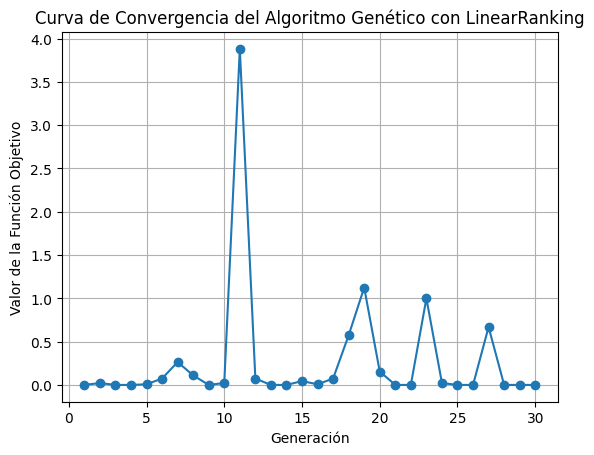

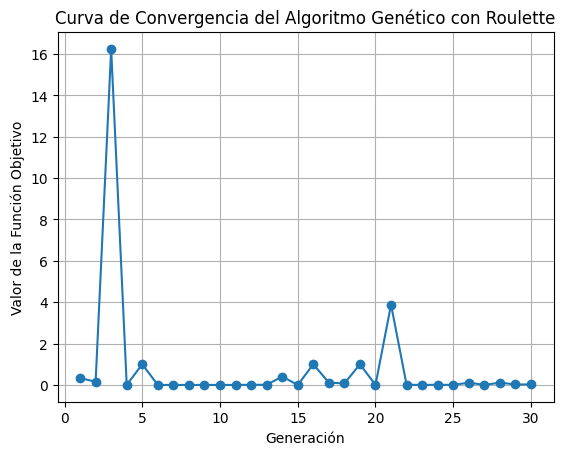

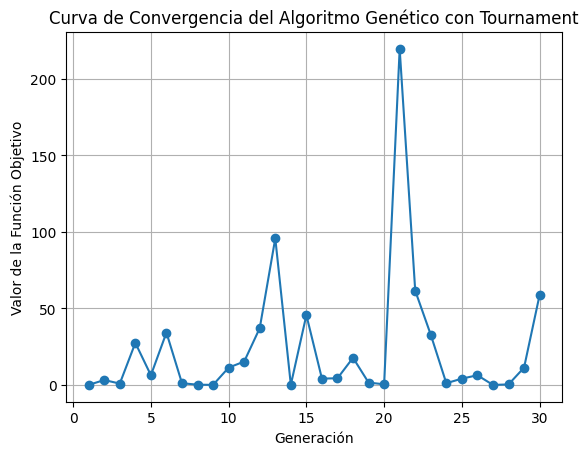

In [10]:
import matplotlib.pyplot as plt
for df, algorithm in zip([df_linear_ranking, df_roulette, df_tournament], algorithms):
    x = df['run']
    y = df['best solution']

    plt.plot(range(1, len(x) + 1), [w**2 for w in y], marker='o')
    plt.xlabel('Generación')
    plt.ylabel('Valor de la Función Objetivo')
    plt.title(f'Curva de Convergencia del Algoritmo Genético con {algorithm}')
    plt.grid(True)
    plt.show()

f. (Valor 0.5 puntos) Interpretar tanto las combinaciones de parámetros
encontradas en cada uno de los 3 algoritmos como sus graficas de
convergencia en el ítem anterior y explicarlas en el .pdf.

## Ejercicio 3

La distribución de la concentración de cierto contaminante en un canal está
descrita por la ecuación:

$$
c(x,y) = 7.7 + 0.15x + 0.22y - 0.05x^2 -0.016y^2-0.007xy
$$

En donde, las variables independientes se encuentran entre los límites de –10 ≤
x ≤ 10, 0 ≤ y ≤ 20.
Para la función de adaptación anterior, escribir y ejecutar dos algoritmos
genéticos que utilicen el operador de selección por ruleta y torneo
respectivamente con probabilidades de cruza y mutación a elección. Luego
realizar las siguientes consignas para ambos algoritmos:

Cómo serian los nuevos x_max y x_min?

- Hacemos de cuenta que el problema original se trata de un solo cromosoma de 30 bits.
- No hace falta un remappeo de los bits a un nuevo x_max y x_min ya que usando los bits del cromosoma ya sabemos como evaluar la función objetivo.
Es por eso que el nuevo intervalo de "x_min" y "x_max" es de $[0, 2^{totalbits} -1]$


Para no cambiar los algoritmos ya implementados, decidimos ajustar la target function.
Para escribir código de forma limpia y realizar calculos internos se creó la clase BivariateTargetFun.

In [19]:
from EvolutionaryAlgorithm import BivariateTargetFun
bivariate = BivariateTargetFun(x1_min=-10, x1_max=10, x2_min=0, x2_max=20, decimal_places=3)

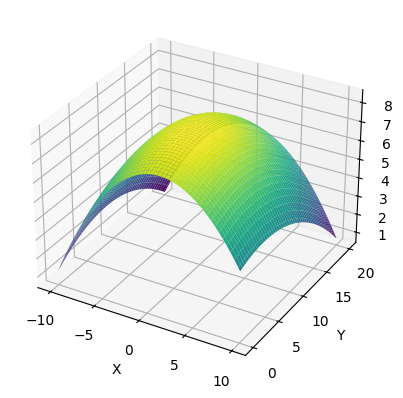

In [20]:
bivariate.plot_function()

Se sabe que el óptimo en esta región es con 
- x$\approx$1.03
- y$\approx$6.65

Da un valor fitness$\approx$8.51


In [17]:
from EvolutionaryAlgorithm import Roulette, BivariateTargetFun
import pandas as pd

bivariate = BivariateTargetFun(x1_min=-10, x1_max=10, x2_min=0, x2_max=20, decimal_places=3)

executions = 30
df = pd.DataFrame()
for run in range(executions):

    ea = Roulette(
        generations=10,
        chromosome_length=bivariate.total_bits,
        population_length=4,
        maximize=True,
        target_fn=bivariate.target_fun,
        elitism=True,
        crossover_rate=0.9,
        x_min=0,
        x_max=2**bivariate.total_bits-1,
        mutation_rate=0.1
    )
    ea.execute()
    chromosome, best, fitness = ea.get_best_individual()
    _x,_y = bivariate.split_answer(chromosome)
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "x(best)": _x, "y(best)": _y, "fitness": fitness}
    df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)      
    
display(df)

,run,best chromosome,best solution,x(best),y(best),fitness
0,0,011110110011000011010011010000,516699344.0,-0.375683,8.252205,8.384195
1,1,011111111111110010110001100001,536816737.0,-0.000916,6.934416,8.456101
2,2,100000101111101010111110100101,549367717.0,0.232856,7.444685,8.471140
3,3,100011101010000001110110110000,598220208.0,1.142918,4.638813,8.445254
4,4,011111111001011011001001011011,535147099.0,-0.032044,7.868282,8.437371
5,5,101000111110101010010010000010,687514754.0,2.806177,5.704520,8.349469
6,6,100010111101000100100000100001,586434593.0,0.923185,11.270486,8.170156
7,7,100010111010110010110011010110,585837782.0,0.912198,7.005829,8.506466
8,8,100001111000011010100110100101,568437157.0,0.588092,6.507157,8.498219
9,9,100101000111011001101100101010,622697258.0,1.598865,4.244514,8.410045


In [18]:
from EvolutionaryAlgorithm import Tournament
df_tournament = pd.DataFrame()
for run in range(executions):

    eaTournament2 = Tournament(
        tournament_size=3,
        generations=30,
        chromosome_length=bivariate.total_bits, 
        population_length=4,
        maximize=True,
        target_fn=bivariate.target_fun,
        elitism=False,
        crossover_rate=crossover_rate,
        x_min=0,
        x_max=2**bivariate.total_bits-1,
        mutation_rate=mutation_rate
    )
    eaTournament2.execute()
    chromosome, best, fitness = eaTournament2.get_best_individual()
    _x,_y = bivariate.split_answer(chromosome)
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "x(best)": _x, "y(best)": _y, "fitness": fitness}
    
    df_tournament = pd.concat([df_tournament, pd.DataFrame([row])], ignore_index=True)      
    
display(df_tournament)

,run,best chromosome,best solution,x(best),y(best),fitness
0,0,110100011100101001000000001011,8.799232e+08,6.390271,2.506790,6.955579
1,1,101100000000000000111100100110,7.382014e+08,3.750420,2.367016,7.928239
2,2,100010000100000100110001001111,5.714935e+08,0.644856,11.923582,8.070553
3,3,011100111010010101001110000000,4.850533e+08,-0.965300,13.047273,7.743475
4,4,100100000100000111101110100010,6.050600e+08,1.269875,19.318216,5.917042
5,5,111101111100100011010100110011,1.039284e+09,9.358501,8.312632,4.903323
6,6,100000101011011101011101100010,5.482638e+08,0.212104,13.653981,7.730270
7,7,001011111101010100110001111100,2.006253e+08,-6.263314,11.951048,5.667010
8,8,101001011010011101110000111101,6.948035e+08,2.941679,14.412671,7.258982
9,9,101010000001010011001111110001,7.049840e+08,3.131504,8.116092,8.233106
